In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

In [2]:
lobster_land_campaigns = pd.read_csv('lobster_land_campaigns_new.csv')

In [3]:
lobster_land_campaigns.head()

,customerID,campaign_seen,total_spending
0,1,Relaxation and Leisure Drive,59.102643
1,2,Loyalty Reward Push,93.802344
2,3,Family Fun Campaign,43.236077
3,4,Relaxation and Leisure Drive,78.009404
4,5,Relaxation and Leisure Drive,59.598420


In [4]:
lobster_land_campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      2500 non-null   int64  
 1   campaign_seen   2500 non-null   object 
 2   total_spending  2500 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 58.7+ KB


customerID categorical

campaign_seen categorical

total_spending numeric

In [5]:
missing_values = lobster_land_campaigns['campaign_seen'].isna().sum()
missing_values

0

Family Fun Campaign             656
Relaxation and Leisure Drive    620
Loyalty Reward Push             612
Thrill Seeker Blitz             612
Name: campaign_seen, dtype: int64


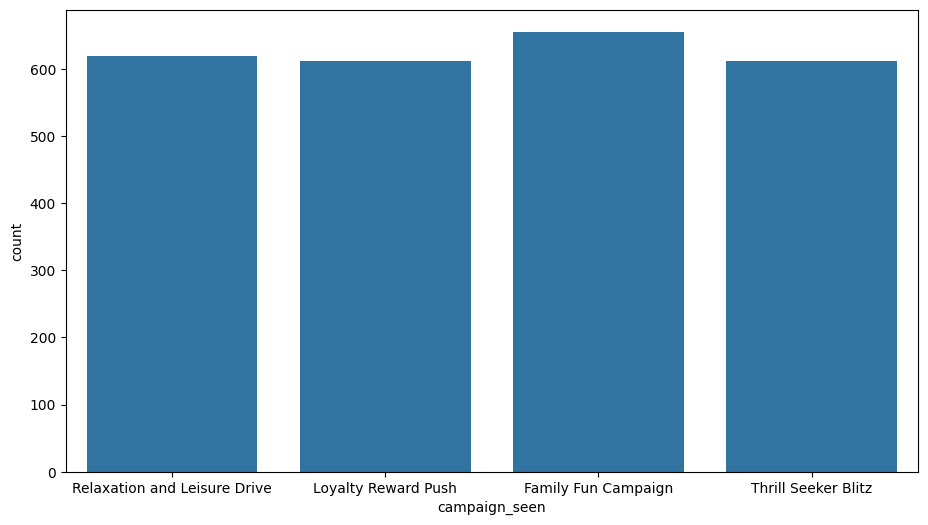

In [7]:
plt.figure(figsize=(11, 6))
sns.countplot(x='campaign_seen', data=lobster_land_campaigns)
counts = lobster_land_campaigns['campaign_seen'].value_counts()
print(counts)


*The count plot reveals that the Family Fun Campaign has the highest occurrence (656), indicating strong interest or engagement. Following closely is the Relaxation and Leisure Drive campaign (620), suggesting significant interest in leisure-oriented offerings. The Loyalty Reward Push and Thrill Seeker Blitz have equal counts (612), indicating similar levels of interest, albeit slightly lower compared to the former campaigns. Overall, it showcases varying degrees of interest across the campaigns, with the Family Fun Campaign. *
*The Family Fun Campaign likely garnered the highest count due to the nature of Lobster Land as a theme park, which typically attracts more families seeking leisure activities. The campaign's emphasis on family-oriented attractions would resonate strongly with parents looking for opportunities to bond with their children. Additionally, the messaging may evoke emotional connections, reinforcing the idea of Lobster Land as a place for family bonding and creating cherished memories. As a result, families may be more inclined to engage with and respond to the Family Fun Campaign, contributing to its higher count compared to other campaigns.*

*No, it is not a requirement for every group to have the same sample size in two-sample t-tests. In fact, unequal sample sizes are quite common in practice. The two-sample t-test can still be performed effectively even when the sample sizes between groups differ, as long as certain assumptions are met. These assumptions typically include the normality of data distribution and homogeneity of variances between groups. However*

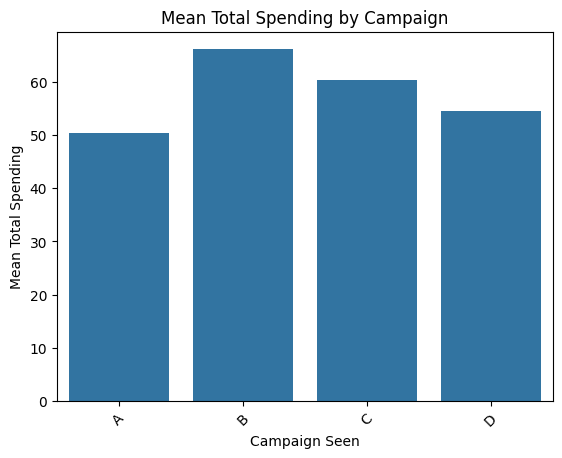

In [12]:
mean_of_total_spending = lobster_land_campaigns.groupby('campaign_seen')['total_spending'].mean().reset_index()
sns.barplot(x='campaign_seen', y='total_spending', data=mean_of_total_spending)
plt.xlabel('Campaign Seen')
plt.ylabel('Mean Total Spending')
plt.title('Mean Total Spending by Campaign')
plt.xticks(rotation=45)
plt.show()

*The barplot illustrates the mean total spending for each campaign, revealing distinct patterns among them. Loyalty Reward Push campaign exhibits the highest mean spending, followed by Relaxation and Leisure Drive, Thrill Seeker Blitz, and Family Fun Campaign, in descending order. This suggests that visitors engaging with the Loyalty Reward Push campaign tend to spend more on average compared to those interacting with other campaigns. The descending trend in mean spending across the campaigns might indicate varying levels of effectiveness in enticing spending behavior among visitors targeted by different campaigns.*

*Loyalty Reward Push specifically targets returning visitors with enhanced loyalty program benefits, including special discounts and personalized experiences. This targeted approach may resonate more strongly with previous visitors, encouraging them to spend more during their next visit. Additionally, the use of direct emails, app notifications, and targeted social media ads may effectively reach and engage this audience, further driving spending. Meanwhile, the other campaigns may target broader demographics or offer different types of experiences, resulting in varying levels of spending. Overall, the observed differences highlight the importance of tailored marketing efforts and personalized incentives in influencing visitor spending behavior.*

***What null hypothesis will you use for your tests?***
*For the two-sample t-tests comparing Campaigns A vs. B, A vs. C, A vs.*italicised text* D, B vs. C, B vs. D, and C vs. D:*
1. ***Null hypothesis (H0):*** *The mean spending_total for the target audience of both Campaigns are equal.*

2. ***Alternative hypothesis (H1):*** *The mean spending_total for the target audience of both Campaigns is not equal.*

*We conduct the t-tests to assess whether there's sufficient evidence to reject the null hypothesis, indicating a significant difference in spending_total between the target audiences of the compared campaigns*.

***What alpha threshold do you wish to use for this test?***
*The threshold I would like to use in 0.05*

***What is a Bonferroni correction? Explain its purpose?***
*The Bonferroni correction is a statistical technique used to mitigate the increased risk of false positives when conducting multiple hypothesis tests simultaneously. By adjusting the significance threshold for each test based on the number of comparisons being made, the Bonferroni correction reduces the probability of incorrectly rejecting the null hypothesis. This adjustment ensures a more stringent criterion for declaring statistical significance in individual tests, thereby controlling the familywise error rate and improving the reliability of study findings in the presence of multiple comparisons.*

***With a Bonferroni correction in mind, what is the new alpha threshold that you will use for the six tests? ***
*0.05/6=0.0083*


In [9]:
grouped_describe = lobster_land_campaigns.groupby('campaign_seen')['total_spending'].describe()
grouped_describe

,count,mean,std,min,25%,50%,75%,max
campaign_seen,,,,,,,,
Family Fun Campaign,656.0,50.435237,9.849416,19.804878,43.224429,50.716446,57.128941,76.207931
Loyalty Reward Push,612.0,66.111465,20.936328,8.029148,51.712150,65.871171,79.577644,143.524754
Relaxation and Leisure Drive,620.0,60.384585,9.996980,30.088640,53.986872,60.182524,67.212421,89.852590
Thrill Seeker Blitz,612.0,54.563578,14.610600,11.179743,45.226902,54.437884,63.956034,98.026046


In [10]:
lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'Family Fun Campaign', 'campaign_seen'] = 'A'
lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'Loyalty Reward Push', 'campaign_seen'] = 'B'
lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'Relaxation and Leisure Drive', 'campaign_seen'] = 'C'
lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'Thrill Seeker Blitz', 'campaign_seen'] = 'D'

new_alpha = 0.0083

# A vs. B
t_statistic_AB, p_value_AB = stats.ttest_ind(lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'A', 'total_spending'].values, lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'B', 'total_spending'].values, equal_var=False)
print("T-statistic (A vs. B):", t_statistic_AB)
print("P-value (A vs. B):", p_value_AB)
if p_value_AB < new_alpha:
    print("Reject null hypothesis: There is a statistically significant difference between the groups.")
else:
    print("Fail to reject null hypothesis: There is no statistically significant difference between the groups.")



# A vs. C
t_statistic_AC, p_value_AC = stats.ttest_ind(lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'A', 'total_spending'].values, lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'C', 'total_spending'].values, equal_var=False)
print("T-statistic (A vs. C):", t_statistic_AC)
print("P-value (A vs. C):", p_value_AC)
if p_value_AC < new_alpha:
    print("Reject null hypothesis: There is a statistically significant difference between the groups.")
else:
    print("Fail to reject null hypothesis: There is no statistically significant difference between the groups.")



# A vs. D
t_statistic_AD, p_value_AD = stats.ttest_ind(lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'A', 'total_spending'].values, lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'D', 'total_spending'].values, equal_var=False)
print("T-statistic (A vs. D):", t_statistic_AD)
print("P-value (A vs. D):", p_value_AD)
if p_value_AD < new_alpha:
    print("Reject null hypothesis: There is a statistically significant difference between the groups.")
else:
    print("Fail to reject null hypothesis: There is no statistically significant difference between the groups.")


# B vs. C
t_statistic_BC, p_value_BC = stats.ttest_ind(lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'B', 'total_spending'].values, lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'C', 'total_spending'].values, equal_var=False)
print("T-statistic (B vs. C):", t_statistic_BC)
print("P-value (B vs. C):", p_value_BC)
if p_value_BC < new_alpha:
    print("Reject null hypothesis: There is a statistically significant difference between the groups.")
else:
    print("Fail to reject null hypothesis: There is no statistically significant difference between the groups.")



# B vs. D
t_statistic_BD, p_value_BD = stats.ttest_ind(lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'B', 'total_spending'].values, lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'D', 'total_spending'].values, equal_var=False)
print("T-statistic (B vs. D):", t_statistic_BD)
print("P-value (B vs. D):", p_value_BD)
if p_value_BD < new_alpha:
    print("Reject null hypothesis: There is a statistically significant difference between the groups.")
else:
    print("Fail to reject null hypothesis: There is no statistically significant difference between the groups.")


# C vs. D
t_statistic_CD, p_value_CD = stats.ttest_ind(lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'C', 'total_spending'].values, lobster_land_campaigns.loc[lobster_land_campaigns['campaign_seen'] == 'D', 'total_spending'].values, equal_var=False)
print("T-statistic (C vs. D):", t_statistic_CD)
print("P-value (C vs. D):", p_value_CD)
if p_value_CD < new_alpha:
    print("Reject null hypothesis: There is a statistically significant difference between the groups.")
else:
    print("Fail to reject null hypothesis: There is no statistically significant difference between the groups.")






T-statistic (A vs. B): -16.863884561490995
P-value (A vs. B): 2.6352793334442102e-55
Reject null hypothesis: There is a statistically significant difference between the groups.
T-statistic (A vs. C): -17.896261089273285
P-value (A vs. C): 4.8921233681540315e-64
Reject null hypothesis: There is a statistically significant difference between the groups.
T-statistic (A vs. D): -5.857782055098696
P-value (A vs. D): 6.2522224037515884e-09
Reject null hypothesis: There is a statistically significant difference between the groups.
T-statistic (B vs. C): 6.113850825893892
P-value (B vs. C): 1.4649250785274103e-09
Reject null hypothesis: There is a statistically significant difference between the groups.
T-statistic (B vs. D): 11.18977260645854
P-value (B vs. D): 1.3581505272741723e-27
Reject null hypothesis: There is a statistically significant difference between the groups.
T-statistic (C vs. D): 8.151043996904265
P-value (C vs. D): 9.93055722710709e-16
Reject null hypothesis: There is a stat

The results of the t-tests indicate statistically significant differences in spending behavior among visitors exposed to different campaigns at Lobster Land. Specifically, the Thrill Seeker Blitz and Relaxation and Leisure Drive campaigns appear to attract visitors who spend more compared to the Family Fun Campaign and Loyalty Reward Push. Lobster Land can leverage these insights to optimize their marketing strategies and allocate resources more effectively.

For example, they could focus on promoting the Thrill Seeker Blitz and Relaxation and Leisure Drive campaigns to attract visitors who are likely to spend more, thereby increasing revenue. Additionally, the could tailor promotional offers or experiences based on the preferences and interests of visitors attracted by each campaign:

*1. Thrill Seeker Blitz:*

* Offer discounted or bundled tickets for adrenaline-pumping
rides and attractions.
* Organize special events or exclusive access to new thrill rides for visitors who purchase tickets through the Thrill  Seeker Blitz campaign.

*2. Relaxation and Leisure Drive:*
* Introduce relaxation packages that include access to spa services, tranquil areas, and leisurely activities within the park.
* Offer discounts on food and beverage packages for visitors interested in leisurely dining experiences.
* Create themed relaxation zones with comfortable seating, shade, and scenic views for visitors to unwind and enjoy their time in the park.

*Now that we Know peopl coming from Family Fun Campaign Spends less compared to others so we can do the following*

*3. Family Fun Campaign:*

* Develop family-friendly package deals that include admission tickets for parents and children, along with perks like complimentary meals or souvenirs.
* Organize family-oriented events such as character meet-and-greets, interactive shows, and themed parades.
* Offer discounted rates for group bookings or multi-day passes to encourage families to extend their stay at the park.

*4. Loyalty Reward Push:*  

* Offer personalized offers or upgrades based on visitors' past spending behavior or preferences, rewarding their loyalty with tailored perks.

*By tailoring promotional offers and experiences to the unique preferences and interests of visitors attracted by each campaign, Lobster Land can enhance the overall guest experience, increase customer satisfaction, and ultimately drive higher spending from all campaigns and repeat visits to the park.*



*In addition to customer segmentation and personalized campaigns, Lobster Land can implement an omnichannel marketing strategy. This approach ensures seamless communication across various channels such as email, social media, mobile apps, and physical touchpoints within the park. By integrating these channels, Lobster Land can create a unified and cohesive brand experience for visitors, regardless of how they interact with the park. Utilizing data analytics and customer feedback, Lobster Land can continuously refine its marketing efforts, optimizing them for each segment and channel. Moreover, fostering community engagement through user-generated content and interactive experiences can further enhance the overall visitor experience and strengthen brand loyalty.*

***Part 2- Chi-Square Goodness of Fit***

Null Hypothesis (H₀): The observed distribution of preferences for attractions at Lobster Land is consistent with the expected distribution based on historical data.

Alternative Hypothesis (H₁): The observed distribution of preferences for attractions at Lobster Land is not consistent with the expected distribution based on historical data.

***Under the null hypothesis, what is our expected number of respondents for roller coasters, water rides, Lobsterama Restaurant, Marine Life Exhibit, and the Lobsterland Merchandise Shop***?

Given the total number of respondents is the sum of all preferences:

Total number of respondents = 150 + 120 + 90 + 80 + 60 = 500

Now, we can calculate the expected number of respondents for each attraction:

Expected number for Roller Coasters: 30% of 500 = 0.30 * 500 = 150
Expected number for Water Rides: 25% of 500 = 0.25 * 500 = 125
Expected number for Lobsterama Restaurant: 15% of 500 = 0.15 * 500 = 75
Expected number for Marine Life Exhibit: 15% of 500 = 0.15 * 500 = 75
Expected number for Lobsterland Merchandise Shop: 15% of 500 = 0.15 * 500 = 75
So, under the null hypothesis, the expected number of respondents for each attraction would be:

Roller Coasters: 150

Water Rides: 125

Lobsterama Restaurant: 75

Marine Life Exhibit: 75

Lobsterland Merchandise Shop: 75



In [11]:
observed = [150,120,90,80,60]
expected = [150, 125, 75,75,75]
chisq, pvalue = chisquare(f_obs= observed, f_exp= expected)

alpha = 0.05
if pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
print("The chisquare value is :" , chisq)
print("The p-value is :", pvalue)

Fail to reject the null hypothesis
The chisquare value is : 6.533333333333333
The p-value is : 0.16270219326739285


*Based on the chi-square test results, with a chi-square value of 6.53 and a corresponding p-value of 0.16, we fail to reject the null hypothesis. This indicates that there is insufficient evidence to conclude that the observed distribution of preferences for attractions at Lobster Land significantly differs from the expected distribution based on historical data. In other words, the observed frequencies of attraction preferences align reasonably well with the expected frequencies, suggesting that visitor preferences may have remained relatively consistent over time. However, it's important for Lobster Land to continue monitoring visitor preferences through periodic surveys to ensure they stay in tune with customer expectations and adapt their offerings accordingly.*


χ2 = ∑ (O-E)2/E
Where:

O
O is the observed frequency.
E
E is the expected frequency.
Now, let's perform the calculation for each attraction:

For Roller Coasters:

(150-150)2/150 =0

For Water Rides: (120-125)2/125= 0.2

For Lobsterama Restaurant: (90-75)2/75 = 3

For Marine Life Exhibit: (80-75)2/75=0.33

For Lobsterland Merchandise Shop:(60-75)2/75 = 3


Now, summing up these values:
χ2 =0+0.20+3+0.33+3=6.53

Therefore, the calculated chi-square value is approximately 43.53.

This value represents the measure of how much the observed frequencies deviate from the expected frequencies, considering all the attractions together.





